An aviation take on https://www.kaggle.com/foenix/d/nhtsa/2015-traffic-fatalities/data-exploration-machine-learning
Trying to assess factors related to aviation incidents.

In [13]:
import numpy as np 
import pandas as pd 

# plots
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

from bokeh.io import show
from bokeh.charts import output_notebook
from bokeh.sampledata import us_states
from bokeh.plotting import figure
output_notebook()

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

from sklearn.cluster import KMeans
matplotlib.style.use('ggplot')

# Any results you write to the current directory are saved as output.

ds = pd.read_csv('./AviationDataUP.csv')

Loading BokehJS ...

In [14]:
ds.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20161117X64217,Accident,WPR17WA022,2016-11-14,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING,Foreign,NaN
1,20161116X13203,Accident,CEN17WA040,2016-11-14,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,...,NaN,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Foreign,NaN
2,20161116X62135,Accident,CEN17LA041,2016-11-13,"Port Allen, LA",United States,30.532500,-91.3150,LA46,OMNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Preliminary,22/11/2016
3,20161114X41943,Accident,WPR17LA020,2016-11-12,"Taylor, AZ",United States,34.454722,-110.0575,NaN,NaN,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,MANEUVERING,Preliminary,22/11/2016
4,20161116X04207,Accident,CEN17LA039,2016-11-12,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,1.0,NaN,1.0,VMC,NaN,Preliminary,16/11/2016


In [15]:
ds['Event.Date']

0        2016-11-14
1        2016-11-14
2        2016-11-13
3        2016-11-12
4        2016-11-12
5        2016-11-10
6        2016-11-09
7        2016-11-06
8        2016-11-06
9        2016-11-06
10       2016-11-05
11       2016-11-01
12       2016-10-31
13       2016-10-31
14       2016-10-30
15       2016-10-30
16       2016-10-29
17       2016-10-29
18       2016-10-29
19       2016-10-28
20       2016-10-28
21       2016-10-28
22       2016-10-28
23       2016-10-27
24       2016-10-27
25       2016-10-26
26       2016-10-26
27       2016-10-25
28       2016-10-25
29       2016-10-23
            ...    
79111    1982-01-03
79112    1982-01-03
79113    1982-01-03
79114    1982-01-03
79115    1982-01-03
79116    1982-01-03
79117    1982-01-03
79118    1982-01-03
79119    1982-01-02
79120    1982-01-02
79121    1982-01-02
79122    1982-01-02
79123    1982-01-02
79124    1982-01-02
79125    1982-01-02
79126    1982-01-02
79127    1982-01-02
79128    1982-01-02
79129    1982-01-02


In [16]:
ds.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Report.Status 

In [17]:
ds['times'] = ds['Event.Date'].astype('datetime64[ns]', errors='coerce')
ds['Latitude'] = pd.to_numeric(ds.Latitude, errors='coerce')
ds['Latitude'] = pd.to_numeric(ds.Latitude, errors='coerce')
ds = ds.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [18]:
ds.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,times
2,20161116X62135,Accident,CEN17LA041,2016-11-13,"Port Allen, LA",United States,30.532500,-91.315000,LA46,OMNI,...,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Preliminary,22/11/2016,2016-11-13
3,20161114X41943,Accident,WPR17LA020,2016-11-12,"Taylor, AZ",United States,34.454722,-110.057500,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,VMC,MANEUVERING,Preliminary,22/11/2016,2016-11-12
5,20161111X91241,Accident,ERA17LA042,2016-11-10,"Blairstown, NJ",United States,40.971111,-74.997500,1N7,Blairstown,...,NaN,1.0,NaN,NaN,NaN,VMC,STANDING,Preliminary,22/11/2016,2016-11-10
6,20161109X11027,Accident,ERA17FA038,2016-11-09,"Crescent City, FL",United States,29.408056,-81.514444,16FD,SKINNERS WHOLESALE NURSERY,...,NaN,2.0,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,17/11/2016,2016-11-09
7,20161107X42420,Accident,WPR17LA017,2016-11-06,"Twentynine Palms, CA",United States,34.160000,-115.997500,2CA3,CROSSWINDS,...,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,15/11/2016,2016-11-06


In [19]:
ds['month'] = ds['times'].map(lambda x: x.month)

In [20]:
ds.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,times,month
2,20161116X62135,Accident,CEN17LA041,2016-11-13,"Port Allen, LA",United States,30.532500,-91.315000,LA46,OMNI,...,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Preliminary,22/11/2016,2016-11-13,11
3,20161114X41943,Accident,WPR17LA020,2016-11-12,"Taylor, AZ",United States,34.454722,-110.057500,NaN,NaN,...,NaN,NaN,NaN,2.0,VMC,MANEUVERING,Preliminary,22/11/2016,2016-11-12,11
5,20161111X91241,Accident,ERA17LA042,2016-11-10,"Blairstown, NJ",United States,40.971111,-74.997500,1N7,Blairstown,...,1.0,NaN,NaN,NaN,VMC,STANDING,Preliminary,22/11/2016,2016-11-10,11
6,20161109X11027,Accident,ERA17FA038,2016-11-09,"Crescent City, FL",United States,29.408056,-81.514444,16FD,SKINNERS WHOLESALE NURSERY,...,2.0,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,17/11/2016,2016-11-09,11
7,20161107X42420,Accident,WPR17LA017,2016-11-06,"Twentynine Palms, CA",United States,34.160000,-115.997500,2CA3,CROSSWINDS,...,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,15/11/2016,2016-11-06,11


7     3085
8     2909
6     2874
5     2466
9     2421
4     2104
10    2055
3     1889
11    1551
2     1424
12    1419
1     1400
Name: month, dtype: int64


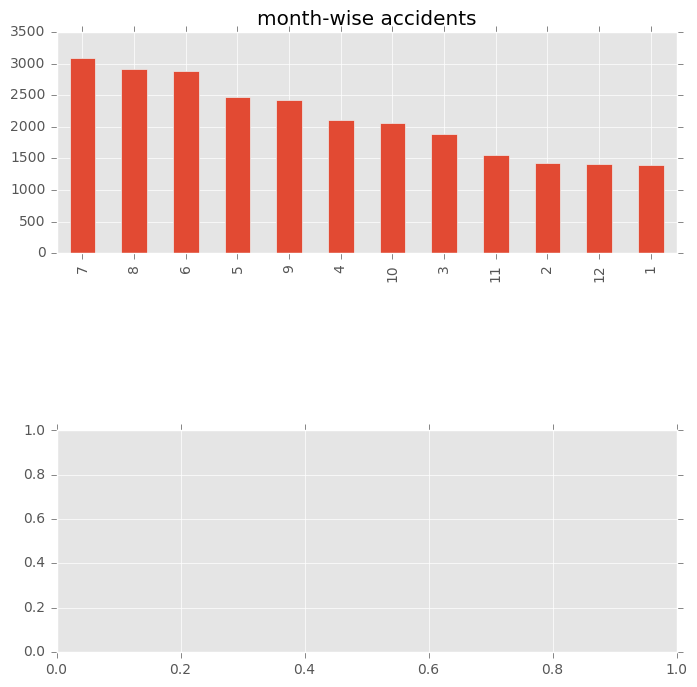

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8, 8))
fig.subplots_adjust(hspace=0.8)
total_month = ds['month'].value_counts()
print(total_month)
ds['month'].value_counts().plot(ax=axes[0], kind='bar', title='month-wise accidents')
ds['cleaned.make'] = ds['Make'].map(lambda x: "{}".format(x).lower().strip())

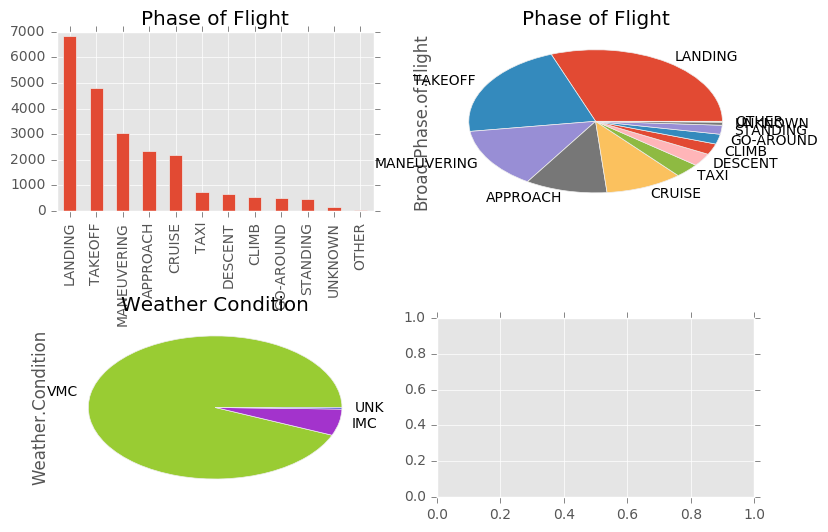

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(9, 6))
fig.subplots_adjust(hspace=.6)
colors = ['#99cc33', '#a333cc', '#333dcc']
ds['Broad.Phase.of.Flight'].value_counts().plot(ax=axes[0,0], kind='bar', title='Phase of Flight')
ds['Broad.Phase.of.Flight'].value_counts().plot(ax=axes[0,1], kind='pie', title='Phase of Flight')
ds['Weather.Condition'].value_counts().plot(ax=axes[1,0], kind='pie', colors=colors, title='Weather Condition')
# TODO: clean up to add "other"
# ds['cleaned.make'].value_counts().plot(ax=axes[1,1], kind='pie', title='Aircraft Make')

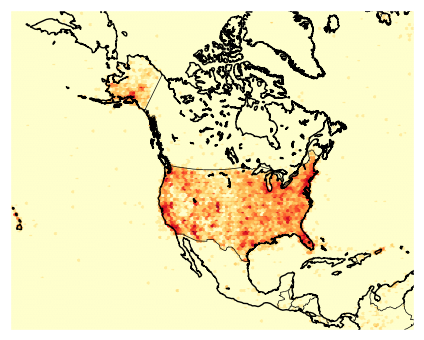

In [23]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
north, south, east, west = 71.39, 24.52, -66.95, 172.5
#m = Basemap(
#    projection='lcc',
#    llcrnrlat=south,
#    urcrnrlat=north,
#    llcrnrlon=west,
#    urcrnrlon=east,
#    lat_1=33,
#    lat_2=45,
#    lon_0=-95,
#    resolution='l')
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.0,urcrnrlon=-2.566,urcrnrlat=46.352,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',area_thresh=1000.0,projection='lcc',
            lat_1=50.0,lon_0=-107.0,ax=ax)
x, y = m(ds['Longitude'].values, ds['Latitude'].values)
m.drawcoastlines()
m.drawcountries()
m.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.YlOrRd)

In [24]:
latlon = ds[['Longitude', 'Latitude']]
latlon.head()

,Longitude,Latitude
2,-91.315000,30.532500
3,-110.057500,34.454722
5,-74.997500,40.971111
6,-81.514444,29.408056
7,-115.997500,34.160000


In [25]:
kmeans = KMeans(n_clusters=50)
kmodel = kmeans.fit(latlon)
centroids = kmodel.cluster_centers_

In [26]:
centroids
lons, lats = zip(*centroids)
print(lats)
print(lons)

(34.264956746684362, 35.797837446280987, 38.464749641748945, 57.946174877049181, 45.325103380165281, -11.021580288888885, 30.777395815737719, 45.99889992886456, -40.027277850000011, 60.820816391198058, -24.182929227272723, 43.09065811398964, 45.399400380645162, 21.142508493902429, 27.650408388085591, -30.812545597014953, 42.007016225806453, -4.5944521944444361, 33.849612037398373, 7.444668807692306, 18.897363938775509, 36.304151100760457, -34.863782854545484, 38.524173873563221, 36.920548280701752, 62.289116152899808, 42.660333128268995, 38.403535906911145, 46.442601178540031, 65.443793137931038, 53.24510769387755, 33.470262883755595, -0.97310166666666476, 4.2135417142857108, 40.651593418541239, -29.593090625000009, 7.1172275576922992, 0.69223284615383562, 60.224592533333336, 37.672671121706401, 34.269548047263676, -13.586680243902435, 32.141416224101476, 48.133771827027026, 40.126462655437919, 37.493859657894738, 42.967832659635661, 41.289008321261676, -21.430429527777783, 5.677780063

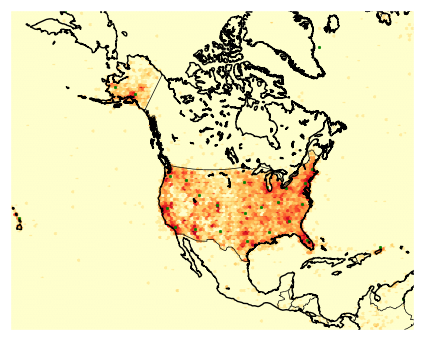

In [27]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
north, south, east, west = 71.39, 24.52, -66.95, 172.5
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.0,urcrnrlon=-2.566,urcrnrlat=46.352,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',area_thresh=1000.0,projection='lcc',
            lat_1=50.0,lon_0=-107.0,ax=ax)
x, y = m(ds['Longitude'].values, ds['Latitude'].values)
m.drawcoastlines()
m.drawcountries()
m.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.YlOrRd)
cx, cy = m(lons, lats)
m.scatter(cx, cy, 3, color='g')

Let's riff on this map a bit more (still going to be population-centric, but there's some interesting stuff happening in Alaska)

In [29]:
from bokeh.sampledata import us_states
us_states = us_states.data.copy()
state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]
p = figure(title="Aviation Incidents and Centroids", 
           toolbar_location="left", plot_width=1100, plot_height=700)
p.patches(state_xs, state_ys, fill_alpha=0.0,
    line_color="#884444", line_width=1.5)
p.circle(ds['Longitude'].data, ds['Latitude'].data, size=1, color='orange', alpha=0.4)
p.circle(lons, lats, size=8, color='navy', alpha=0.6)
show(p)